In [6]:
from pathlib import Path
import MeCab
import pickle
from nlptoolbox.preprocess.preprocess_wikipedia_text import extract_sentences
from nlptoolbox.preprocess.vocabulary import Vocabulary
from nlptoolbox.preprocess.tokenizer import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
sentences = []

text_dir = Path('./data/text/')
for d in text_dir.iterdir():
    for article_file in d.iterdir():
        with article_file.open('r') as f:
            lines = f.readlines()
            sentences.extend(extract_sentences(lines))

In [8]:
len(sentences)

7781879

In [9]:
tokenizer = Tokenizer()
token_sequences = []
for sentence in sentences:
    token_sequence = tokenizer.tokenize(sentence)
    token_sequences.append(token_sequence)

In [6]:
token_sequences[0]

['タウノ・ヴァルデマール・パロ',
 '(、',
 '1908',
 '年',
 '10',
 '月',
 '25',
 '日',
 '-',
 '1982',
 '年',
 '5',
 '月',
 '24',
 '日',
 ')',
 'は',
 'フィンランド',
 'の',
 '俳優',
 '、',
 '歌手',
 '。',
 '一部',
 'で',
 'フィンランド',
 '映画',
 'の',
 '黄金',
 '時代',
 'と',
 '考え',
 'られ',
 'た',
 '時代',
 'に',
 '活躍',
 'し',
 'た',
 '。']

In [15]:
total_word_count = sum([len(token_seq) for token_seq in token_sequences])
print(f'total word: {total_word_count}')

total word: 519102935


In [7]:
token_counts = Vocabulary.count_tokens(token_sequences)

In [9]:
len(token_counts)

2355432

In [10]:
token_counts['は']

15004251

In [12]:
# 単語のカウント辞書を保存
import pickle
with open('token_counts.data', 'wb') as f:
    pickle.dump(token_counts, f)

In [2]:
with open('token_counts.data', 'rb') as f:
    token_counts = pickle.load(f)

In [3]:
sorted_counts = [v for _, v in sorted(token_counts.items(), key=lambda x: -x[-1])]

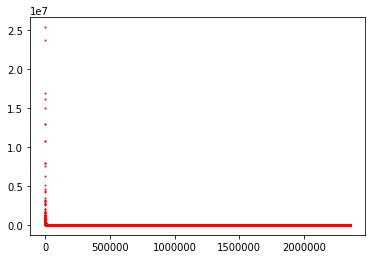

In [19]:
x = np.array(list(range(len(sorted_counts)))) + 1
y = np.array(sorted_counts)

plt.plot(list(range(len(sorted_counts))), sorted_counts, 'ro', markersize=1)

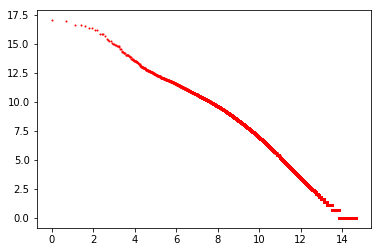

In [17]:
x_log = np.log(x)
y_log = np.log(y)

plt.plot(x_log, y_log, 'ro', markersize=1)


傾き: -1.4561773928944137, 切片: 20.79793487753874





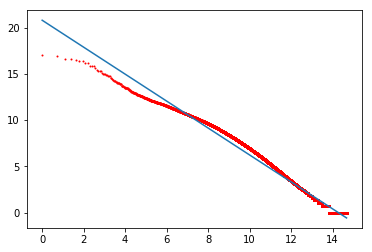

In [18]:
# 直線のフィッティング
a, b = np.polyfit(x_log, y_log, 1)
y_log_fitted = a * x_log + b

# plot
plt.plot(x_log, y_log, 'ro', markersize=1)
plt.plot(x_log, y_log_fitted)
print(f'傾き: {a}, 切片: {b}')
print('\n\n')

In [19]:
[{k: v} for k, v in sorted(token_counts.items(), key=lambda x: -x[-1])][:10]

[{'の': 25328129},
 {'、': 23690906},
 {'。': 16890869},
 {'に': 16146417},
 {'は': 15004251},
 {'を': 12957411},
 {'た': 12910142},
 {'が': 10805259},
 {'で': 10763669},
 {'て': 7963512}]

In [20]:
counter = 0
for k, v in token_counts.items():
    if v == 1:
        counter += 1
# 出現度が1の単語の割合
print(f'出現回数が1の単語の割合: {counter / len(token_counts) * 100} %')

出現回数が1の単語の割合: 56.22985507541717 %


In [28]:
count_words = {}  # {出現頻度: その出現頻度の単語数}
for _, v in token_counts.items():
    if v in count_words:
        count_words[v] += 1
    else:
        count_words[v] = 1

In [33]:
num_word = []
count = []
for k, v in count_words.items():
    num_word.append(v)
    count.append(k)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

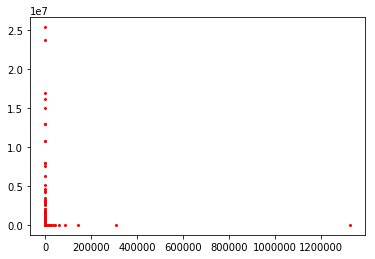

In [42]:
plt.plot(num_word, count, 'ro', markersize=2)

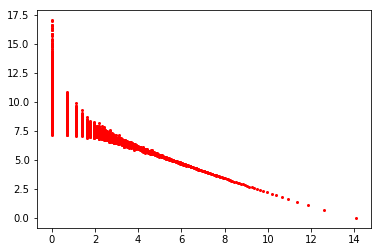

In [43]:
plt.plot(np.log(np.array(num_word)), np.log(np.array(count)), 'ro', markersize=2)